
# Project: Investigate a Dataset - [Tmdb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
1.   How many movies were in each genre?
2.   How many movies were released each year by Walt Disney?
3.   What is the popularity of the most expensive movies based on vote count?
4.   What is the correlation between budget and revenue for movies?
  




In [ ]:
#Import the important libraries pandas, numpy and matploylib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
movie_data = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
#view the dataframe
movie_data.head(10)



In [ ]:
movie_data.info()

In [ ]:
#geneneral summary of the data in the data set
movie_data.describe()

In [ ]:
#check if the data types are correct
movie_data.dtypes


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [ ]:
#releae date has the data type object, I will convert it to datetime data type
movie_data['release_date'] =  pd.to_datetime(movie_data['release_date'])
#check if changes have been made
movie_data.dtypes

In [ ]:
#checking for duplicates
movie_data.duplicated().value_counts()

In [ ]:
#remove duplicates
movie_data.drop_duplicates(inplace = True)

In [ ]:
#checking if the duplicate data has been removed
movie_data.duplicated().sum()

In [ ]:
#check the number of missing values per column
movie_data.isnull().sum()

From the result provided, the clumns that have missing data are;
*   imdb_id 
*   cast                      
*   homepage              
*   director               
*   tagline               
*   keywords               
*   overview                   
*   genres                   
*   production_companies   

To know what method we'll use to handle the missing values, we'll fing the percentage of the missing values

In [ ]:
percent_missing = movie_data.isnull().sum() * 100 / len(movie_data)
percent_missing

In [ ]:
#we will replace the missing values in 'production companies' column with NA so as to perform iterative operations
movie_data['production_companies'] = movie_data['production_companies'].fillna('NA')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How many movies were in each genre?)

In [ ]:
#Retrive the column data from the dataset
genre = movie_data['genres'].str.cat(sep = '|')
genre


In [ ]:
#separating the genres
genre_data = pd.Series(genre.split('|'))
genre_data

In [ ]:
#Counting the occurrence of each genre
genre_count = genre_data.value_counts(ascending = False)
genre_count

In [ ]:
#representing the data in a table
movie_genre = pd.DataFrame(genre_count,columns =['number_of_movies'])
movie_genre


### Research Question 2  (How many movies were released each year by Walt Disney?)

In [ ]:
#get movies that were produced by Walt Disney over the years
movie_data["production_companies"].apply(lambda title: "Walt Disney Pictures" in title).sum()



In [ ]:
movie_production = movie_data.loc[["Walt Disney Pictures" in title for title in movie_data["production_companies"]], ['production_companies', 'release_year']].sort_values('release_year', ascending = False )
movie_production.groupby(['production_companies']).sum()

In [ ]:
#creating a countplot for the above data
plt.figure(figsize=(18, 9))
sns.countplot(x = "release_year", data = movie_production)
plt.title("Count of Movies Produced by Walt Disney Over The Years")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

### Research Question 3  (What is the popularity of the most expensive movies based on vote count?)
<a id="expensive"></a>

In [ ]:

#create a dataset that returns the oriinal itle of a movie, it's vote count and adjusted budget. Then sort the budget in descending order
budget_movie = movie_data[['original_title', 'vote_count', 'budget_adj']].sort_values('budget_adj', ascending = False)
budget_movie.head(5)

In [ ]:

#we'll now draw a histogram to show the distribution of votecounts across different budgets
plt.hist(budget_movie["budget_adj"])
plt.title("Movie Budget")
plt.xlabel("Budget in USD")
plt.ylabel("Vote Counts")           
plt.show()

In [ ]:
#Let's create a function that we will call everytime we create a scatter plot
def scatter_plot(x_data, y_data, title, x_label, y_label):
    data = plt.scatter(x= x_data, y= y_data)
    xlim = plt.xlim(0, 1100)
    title = plt.title(title)
    label1 = plt.xlabel(x_label)
    label2 = plt.ylabel(y_label)
    show = plt.show()
    
    scatterplot = data, xlim, title, label1, label2, show
    return scatterplot


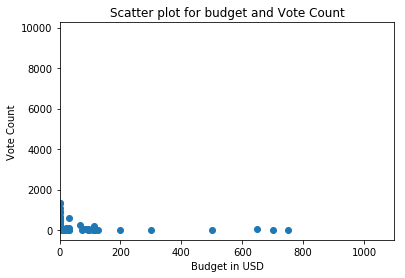

(<matplotlib.collections.PathCollection at 0x7f4d5be58e80>,
 (0, 1100),
 Text(0.5,1,'Scatter plot for budget and Vote Count'),
 Text(0.5,17.2,'Budget in USD'),
 Text(17.2,0.5,'Vote Count'),
 None)

In [21]:
budget_votecount = scatter_plot([movie_data["budget"]], [movie_data["vote_count"]], "Scatter plot for budget and Vote Count", "Budget in USD", "Vote Count")
budget_votecount

<a id='q4'></a>
### Research Question 4  (What is the correlation between budget and revenue for movies?)

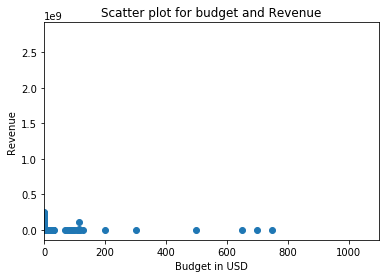

(<matplotlib.collections.PathCollection at 0x7f4d5be83748>,
 (0, 1100),
 Text(0.5,1,'Scatter plot for budget and Revenue'),
 Text(0.5,17.2,'Budget in USD'),
 Text(17.2,0.5,'Revenue'),
 None)

In [20]:
#We'll create a scatter plot that shows the correlation between the budget and revenue for movies, we'll call the scatter_plot function
budget_revenue = scatter_plot([movie_data["budget"]], [movie_data["revenue"]], "Scatter plot for budget and Revenue", "Budget in USD", "Revenue")
budget_revenue
                                                      

## Discussion
For this analysis, I seek to answer four questions. I started out by wrangling the data from the source provided. I then went ahead to assess the data aand clean. 
Exploratory data analysis was done on the dataset based on the different questions. I used scatter plots and count plots to visualise results from the analysis.

<a id='conclusions'></a>
## Conclusions

### Question 1 : How many movies were in each genre?

The dataset has 20 different genres. From the analysis, movies in the Drama genre are the highest produced over the years while Western Genre movies are the least produced.


### Question 2 : How many movies were released each year by Walt Disney?
From the analysis performed, we see that the number of movies produced by Walt Disney Pictures has increased (although not steadily) over the years. 2003 recorded the highest number of movies produced by Walt Disney while 1961 to 1982 recorded the least movie productions by Walt Disney Pictures.

### Question 3 : What is the popularity of the most expensive movies based on vote count?
There is no consice trend between the most expensive movies based on vote count. However, <a href="#expensive">this table</a> summarizes the popularity of the most expensive movies from the dataset.



### Question 4 :  What is the correlation between budget and revenue for movies?
The analysis done points to the conclusion that revenue and budget of a movie are directly proportional.This is evideced in <a href="#q4">this scatterplot</a>, we can see that movies with a low budget produced low revenues while those with a high budget resulted in relativel high revenues.

## Limitations
While analysing the data one of the challenges that I encountered was choosing a method to handle the missig values. from the analysis, the following columns had missing data:
*   imdb_id 
*   cast                      
*   homepage              
*   director               
*   tagline               
*   keywords               
*   overview                   
*   genres                   
*   production_companies   
When working with data in the production_companies column, I thought that dropping rows with null values would be an appropriate way of handling the missing data. However, I realised that dropping over 1000 rows would cause a big dent in the dataset. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])